# About the data
__Covid-19 data set__\
__Data obtained from Mexican government data set__\
__[the data link](https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset)__

# The objective
1. __the current COVID-9 pandemic provides us with an opportunity to ponder and reflect on what we can do better in the way we deal with healthcare to make us humans be more prepared and enabled to combat such an event in the future.__
2. __getting insights that help the Medical kits__

In [1]:
# import the necessary modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score,classification_report

__Get the first intuition__

In [168]:
df = pd.read_csv(r"covid.csv")

In [169]:
df.head(3)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

__about the columns__
1. id:The identification number of the patient
2. sex: Identify gender of the patient, 1 as female and 2 as male.
3. patient_type: Type of patient, 1 for not hospitalized and 2 for hosptalized.
4. entry_date: The date that the patient went to the hospital.
5. date_symptoms: The date that the patient started to show symptoms.
6. date_died: The date that the patient died, “9999-99-99” stands for not specified
7. intubed: Intubation is a procedure that’s used when you can’t breathe on your own. Your doctor puts a tube down your throat and into your windpipe to make it easier to get air into and out of your lungs. A machine called a ventilator pumps in air with extra oxygen. Then it helps you breathe out air that’s full of carbon dioxide (CO2). “1” denotes that the patient used ventilator and “2” denotes that the patient did not, “97” “98” “99” means not specified.
8. pneumonia: Indicates whether the patient already have air sacs inflammation or not “1” for yes, “2” for no, “97” “98” “99” means not specified.
9. age: Specifies the age of the patient.
10. pregnancy: Indicates whether the patient is pregnant or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
11. diabetes: Indicates whether the patient has diabetes or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
12. copd: Indicates whether the patient has Chronic obstructive pulmonary disease (COPD) or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
13. asthma: Indiactes whether the patient has asthma or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
14. inmsupr: Indicates whether the patient is immunosuppressed or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
15. hypertension: Indicates whether the patient has hypertension or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
16. other_disease: Indicates whether the patient has other disease or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
17. cardiovascular: Indicates whether if the patient has heart or blood vessels realted disease, “1” for yes, “2” for no, “97” “98” “99” means not specified.
18. obesity: Indicates whether the patient is obese or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
19. renal_chronic: Indicates whether the patient has chronic renal disease or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
20. tobacco: Indicates whether if the patient is a tobacco user, “1” for yes, “2” for no, “97” “98” “99” means not specified.
21. contact_other_covid: Indicates whether if the patient has contacted another covid19 patient.
22. icu: Indicates whether the if the patient had been admitted to an Intensive Care Unit (ICU), “1” for yes, “2” for no, “97” “98” “99” means not specified.
23. covid_res: 1 indicates person is covid +ve,2 indicates person is covide -ve,3 indicates result is in awaiting process

__Null & Duplicated Values__

In [171]:
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [12]:
df.duplicated().sum()

0

# Data Wrangling

In [172]:
# un-necessary column
df.drop('id',axis=1, inplace=True)
df.head(1)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,...,2,2,2,2,2,2,2,2,1,97


__Deal with un-specified values__

In [173]:
# deal with un-specified values: which mean it's un-known for the gov
un_specified = {1: 'Yes', 2: 'No',97:'Not Specified', 98:'Not Specified',99:'Not Specified'}

In [174]:
df.intubed.replace(un_specified, inplace=True)
df.pneumonia.replace(un_specified, inplace=True)
df.pregnancy.replace(un_specified, inplace=True)
df.diabetes.replace(un_specified, inplace=True)
df.copd.replace(un_specified, inplace=True)
df.asthma.replace(un_specified, inplace=True)
df.inmsupr.replace(un_specified, inplace=True)
df.hypertension.replace(un_specified, inplace=True)
df.other_disease.replace(un_specified, inplace=True)
df.cardiovascular.replace(un_specified, inplace=True)
df.obesity.replace(un_specified, inplace=True)
df.renal_chronic.replace(un_specified, inplace=True)
df.tobacco.replace(un_specified, inplace=True)
df.contact_other_covid.replace(un_specified, inplace=True)
df.icu.replace(un_specified, inplace=True)

__De-code some columns__

In [175]:
df.sex.replace({1: 'Female', 2: 'Male'}, inplace=True)
df.patient_type.replace({1: 'Outpatient', 2: 'Inpatient'}, inplace=True)
df.covid_res.replace({1: 'Positive', 2: 'Negative', 3:'Awaiting Results'}, inplace=True)

__Date Type Columns__

In [20]:
date_fields = ['entry_date','date_symptoms']
for dates in date_fields:
    df[dates] = pd.to_datetime(df[dates], infer_datetime_format=True)   # convert to date type

__Create The Death Column For Modeling__

In [176]:
df['death'] = df['date_died'].apply(lambda x: 0 if x == '9999-99-99' else 1)

In [21]:
# un-Specified dates
df['date_died'].replace('9999-99-99','Not Specified',inplace=True)

## EDA 

__Value-Counts__

In [23]:
columns = df.columns

In [24]:
def value_counts(columns):
    for column in columns:
        if len(df[column].value_counts()) >= 5:  # the pie chart isn't sutable
            continue
        else:
            df[column].value_counts().plot(kind='pie', autopct= '%1.1f%%',figsize = (10,8),fontsize=12)
            plt.title(f"The ratio between vlaues for the {column} column",fontsize=15)
            plt.show()

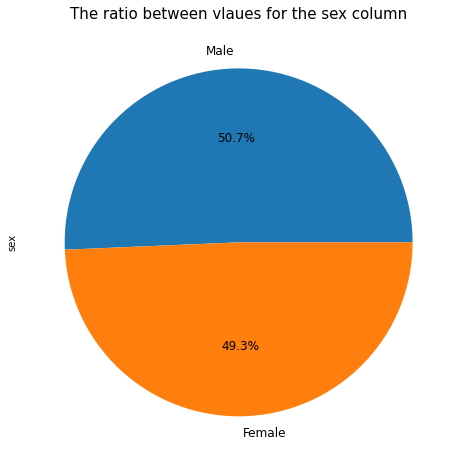

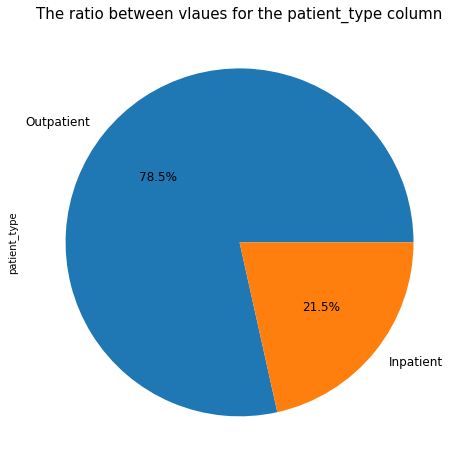

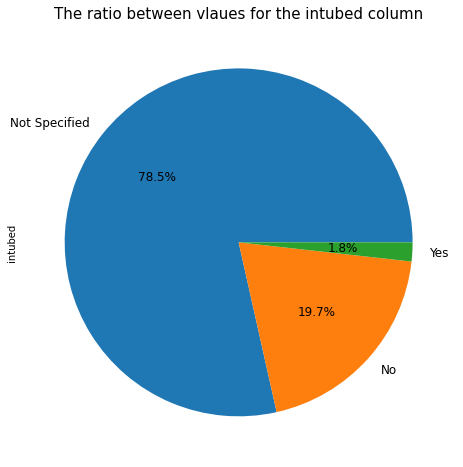

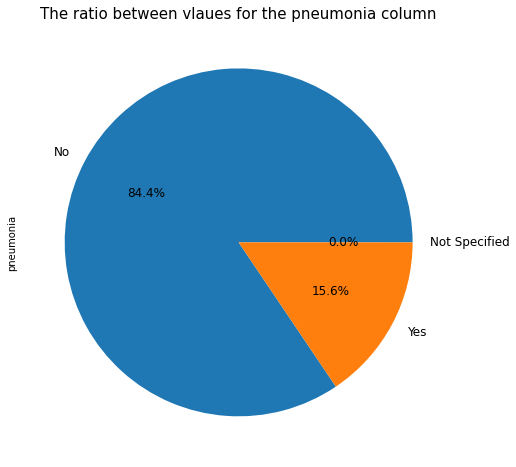

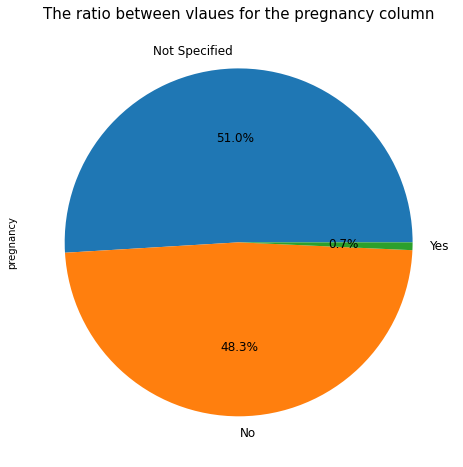

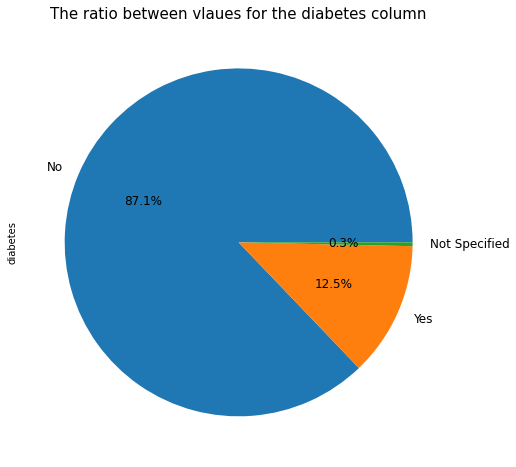

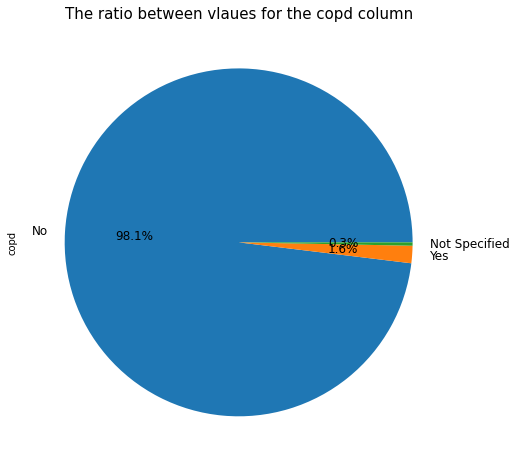

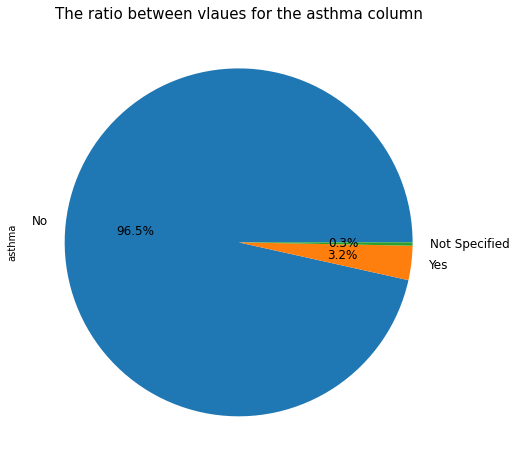

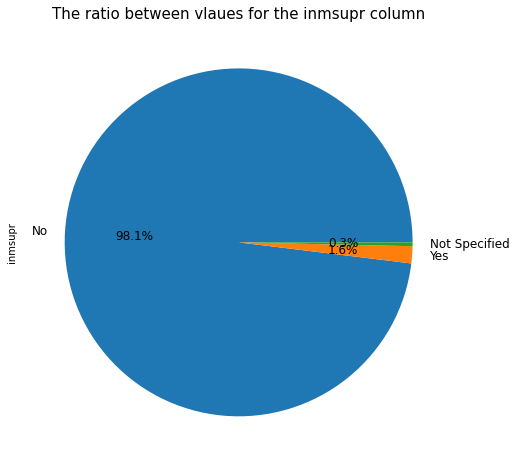

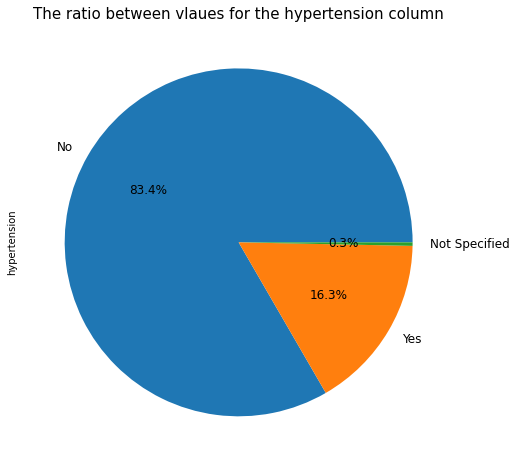

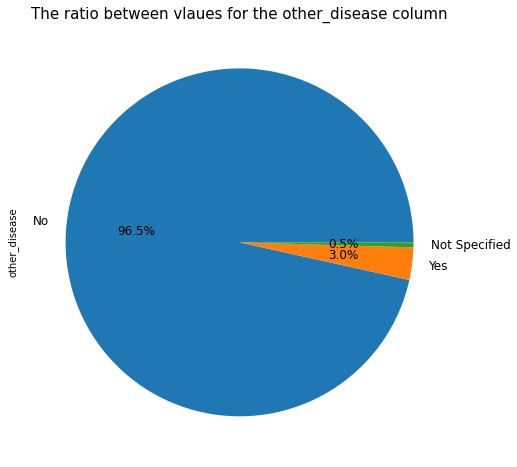

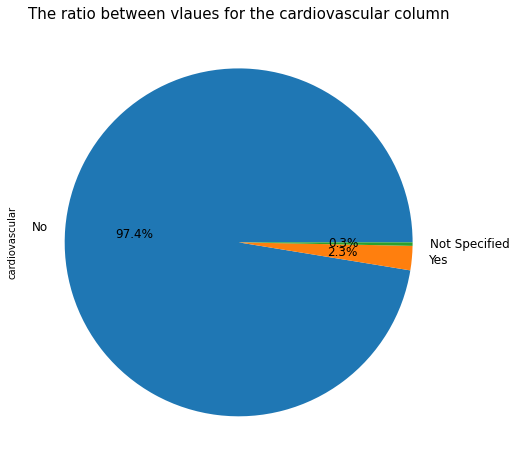

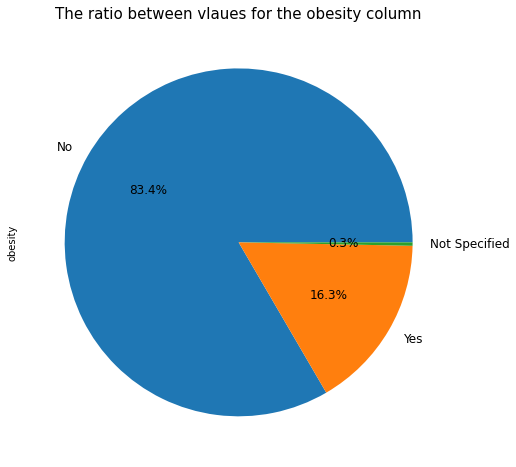

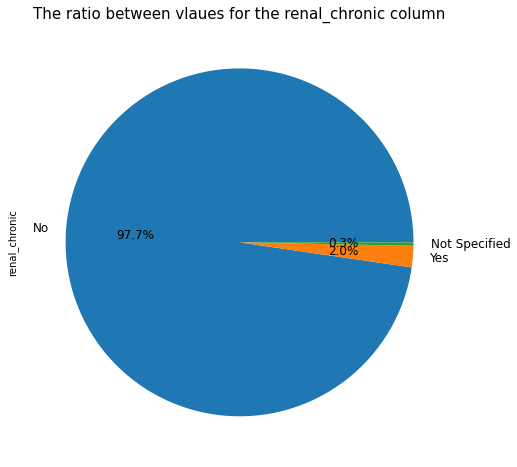

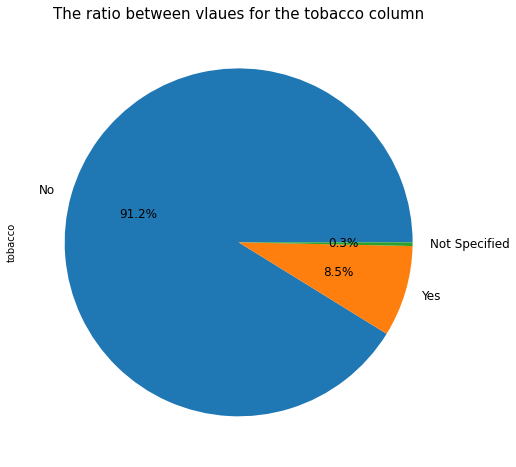

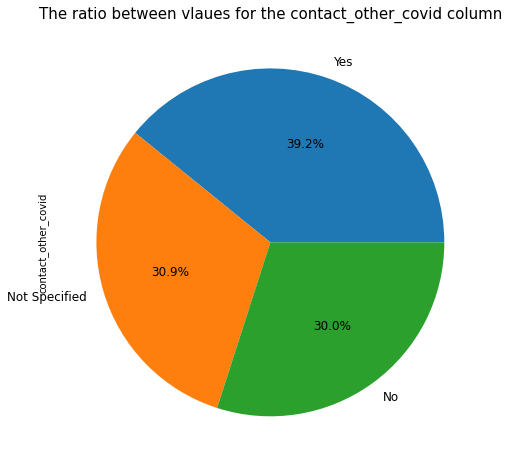

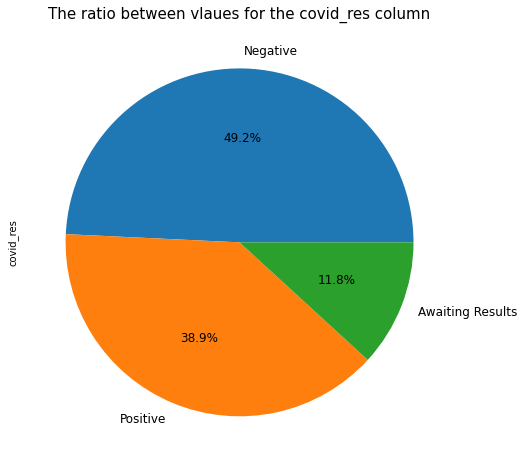

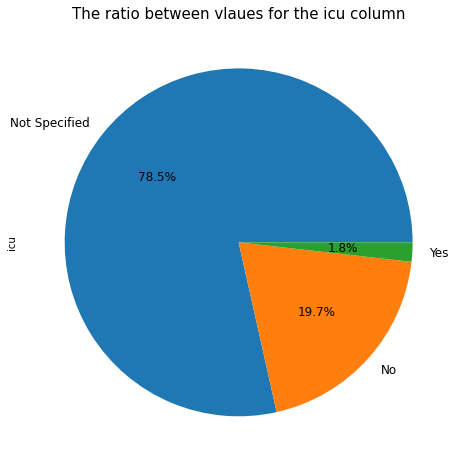

In [25]:
value_counts(columns)

__Conclusions:__
1. the ratio of gender seems to be the same
2. most of the patients is not hospitalized
3. most of the patients didn't got pneumonia
4. most of the womens isn't pregenant
5. most of the patients get diapets
6. most of the patients smokes
7. the ratio of people who got negative result is half if the data set
8. the ratio of people who joined the ICUs is a little bit

__about the first conlusion:__ _Did the ratio between the gendar tests and deaths are the same is the same too?!_


In [26]:
# we need new column indicate the deaths

df['Deaths'] = np.nan

i = 0

for i in range(len(df)):
    if df['date_died'][i] != 'Not Specified':
        df['Deaths'][i] = 'Yes'

C:\Users\Dell\AppData\Local\Temp/ipykernel_4700/2575216485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Deaths'][i] = 'Yes'
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [27]:
df.Deaths.fillna('No',inplace=True)

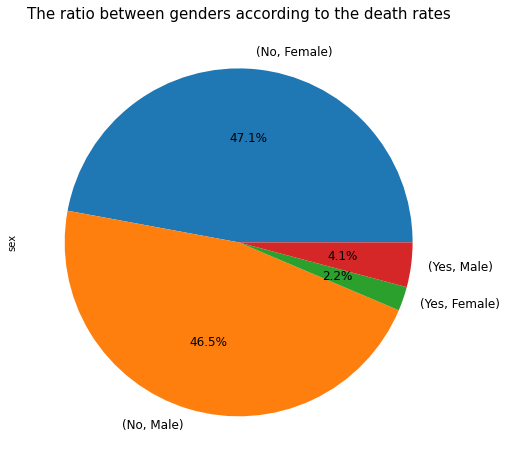

In [28]:
df.groupby(['Deaths','sex'])['sex'].count().plot(kind='pie', autopct= '%1.1f%%',figsize = (10,8),fontsize=12)
plt.title(f"The ratio between genders according to the death rates",fontsize=15)
plt.show()

__Conclusion:The ratio of people who dead of males is duobled from the feamles__

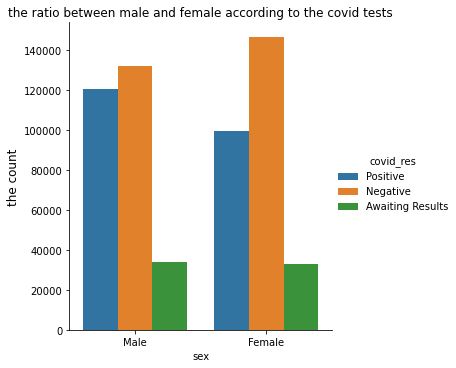

In [29]:
sns.catplot(data=df, kind="count", x="sex", hue="covid_res")
plt.ylabel("the count",fontsize=12)
plt.title("the ratio between male and female according to the covid tests")
plt.show()

__Conclusion: the most patients who become positive are males, and the negative are females__

__Why men?__

In [30]:
# to see the age
df.groupby('sex').mean()

,age
sex,
Female,42.002633
Male,43.225877


In [31]:
# to make sure there's no outliers
df.groupby('sex').median()

,age
sex,
Female,40.0
Male,42.0


__Isolate the diseases columns__

In [32]:
diseases_df = df.iloc[:,9:19 ]

In [33]:
diseases_df['pneumonia'] = df['pneumonia']
diseases_df['sex'] = df['sex']

In [34]:
diseases_df.head(1)

,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,pneumonia,sex
0,No,No,No,No,No,No,No,No,No,No,No,Male


In [35]:
columns = diseases_df.columns

In [36]:
def value_counts(columns):
    for column in columns:
        if column == 'sex':
            continue
        sns.catplot(data=diseases_df, kind="count", x='sex', hue=column)
        plt.ylabel("the count",fontsize=12)
        plt.title(f"The ratio between vlaues for the gender column according to the {column} column",fontsize=15)
        plt.show()
        print('\n\n')

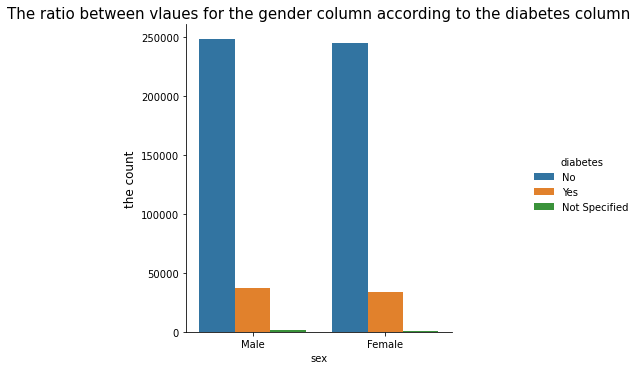

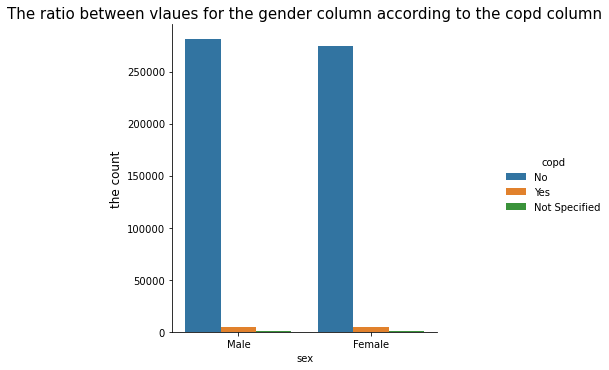

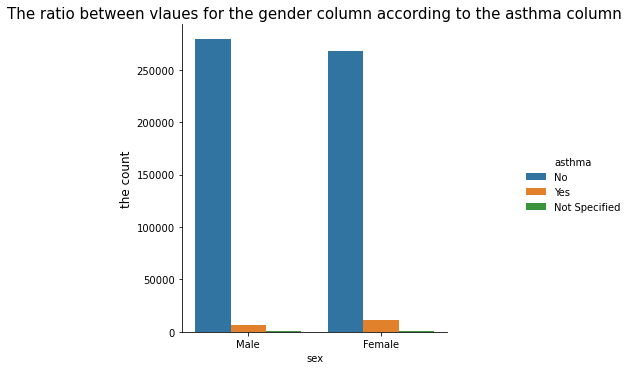

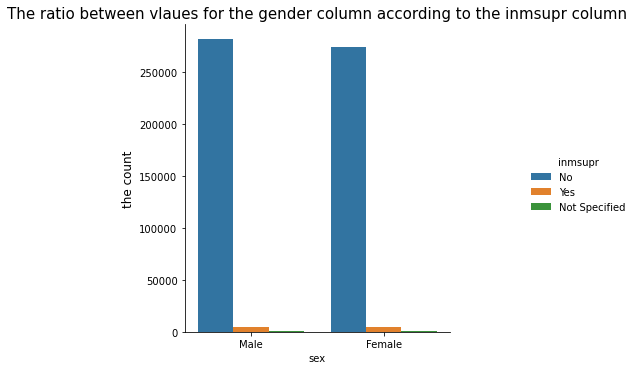

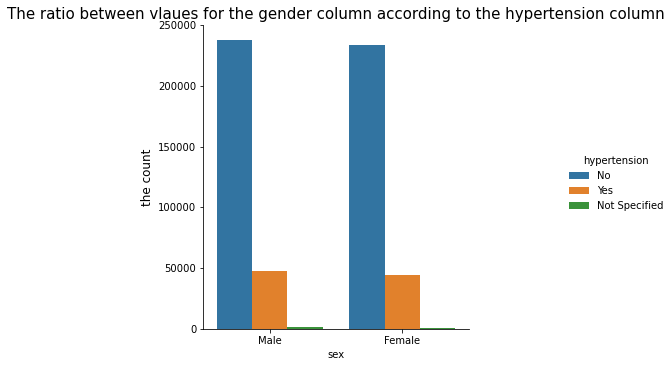

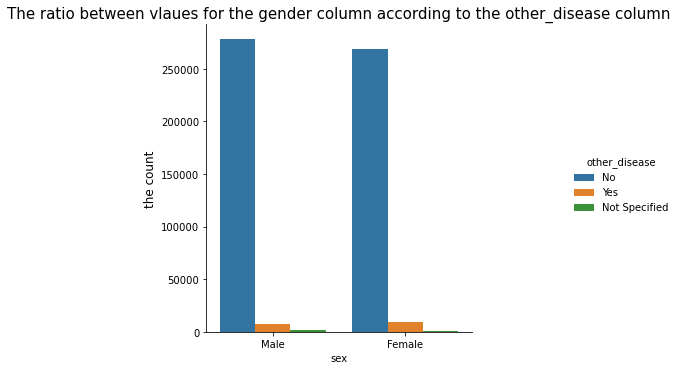

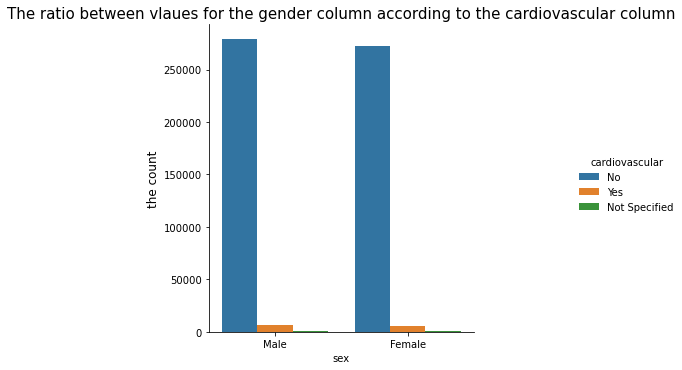

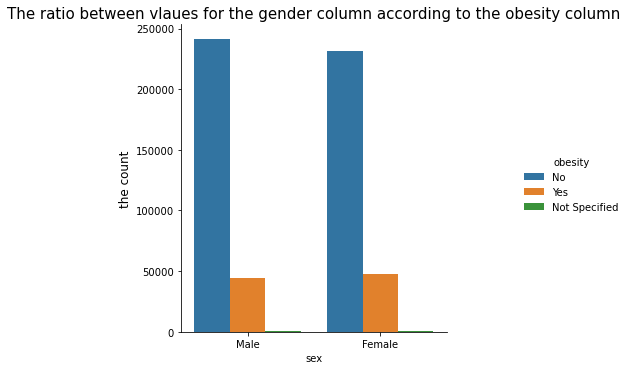

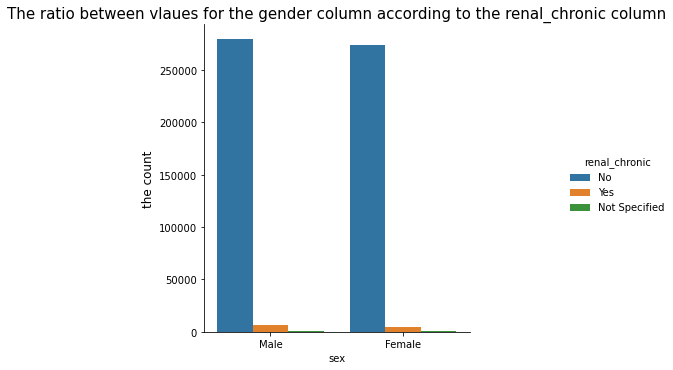

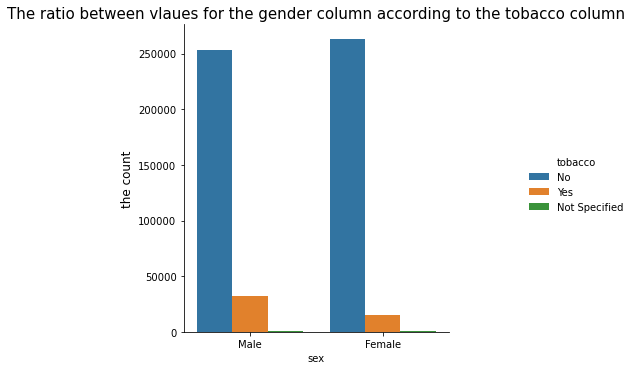

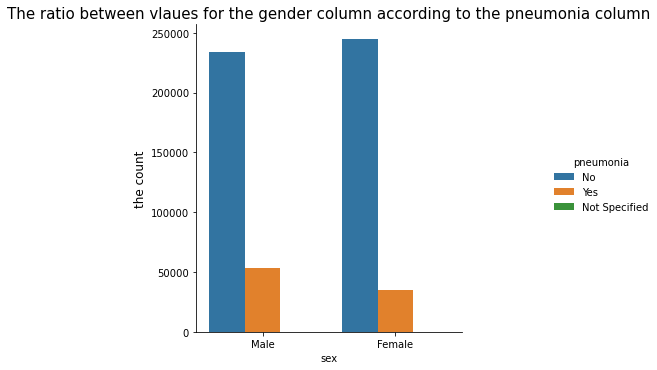

In [37]:
value_counts(columns)

__Conclusions: the big ratio of patients who got _pneumonia_ and _smoke_ are from males__

### About the pie plots second the Conslusions

__most of the patients is not hospitalized__

In [38]:
df.patient_type.value_counts()

Outpatient    444689
Inpatient     121913
Name: patient_type, dtype: int64

__The ratio of hospitals per thousands: _1.38___

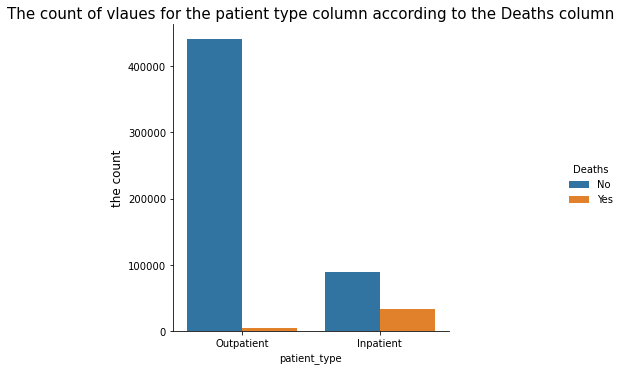

In [39]:
sns.catplot(data=df, kind="count", x='patient_type', hue='Deaths')
plt.ylabel("the count",fontsize=12)
plt.title(f"The count of vlaues for the patient type column according to the Deaths column",fontsize=15)
plt.show()

__Conclusion: Most of the people who leaves survive__\
__According to the ratio of hospitals per thousands: 1.38. So, Mexico gov gives the priority to the dangerous cases__

# What about the Diseases

In [40]:
df_positive = df[df.covid_res == 'Positive']

In [41]:
df_positive.head(2)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths
0,Male,Outpatient,2020-04-05,2020-02-05,Not Specified,Not Specified,No,27,Not Specified,No,...,No,No,No,No,No,No,No,Positive,Not Specified,No
1,Male,Outpatient,2020-03-19,2020-03-17,Not Specified,Not Specified,No,24,Not Specified,No,...,No,No,No,No,No,No,Not Specified,Positive,Not Specified,No


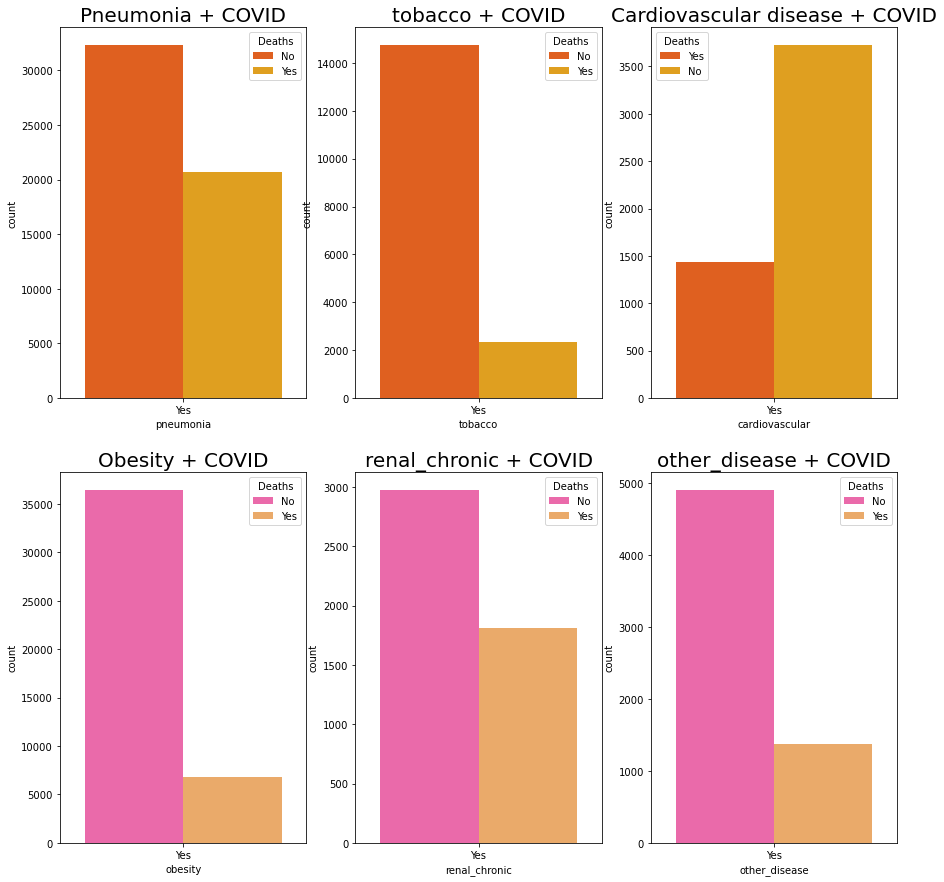

In [42]:
fig2 = plt.figure(figsize=(15,15))
ax1 = fig2.add_subplot(2,3,1)
ax2 = fig2.add_subplot(2,3,2)
ax3 = fig2.add_subplot(2,3,3)
ax4 = fig2.add_subplot(2,3,4)
ax5 = fig2.add_subplot(2,3,5)
ax6 = fig2.add_subplot(2,3,6)

df_pneu = df_positive[df_positive['pneumonia']=='Yes']
df_tobacco = df_positive[df_positive['tobacco']=='Yes']
df_card = df_positive[df_positive['cardiovascular']=='Yes']
df_obes = df_positive[df_positive['obesity']=='Yes']
df_renal_chronic = df_positive[df_positive.renal_chronic == 'Yes']
df_other = df_positive[df_positive.other_disease == 'Yes']

sns.countplot(x= 'pneumonia',data=df_pneu,hue='Deaths',ax=ax1,palette='autumn')
sns.countplot(x= 'tobacco',data=df_tobacco,hue='Deaths',ax=ax2,palette='autumn')
sns.countplot(x= 'cardiovascular',data=df_card,hue='Deaths',ax=ax3,palette='autumn')
sns.countplot(x= 'obesity', data=df_obes,hue='Deaths',ax=ax4,palette='spring')
sns.countplot(x= 'renal_chronic',data=df_renal_chronic,hue='Deaths',ax=ax5,palette='spring')
sns.countplot(x= 'other_disease',data=df_other,hue='Deaths',ax=ax6,palette='spring')

ax1.set_title('Pneumonia + COVID',size=20)
ax2.set_title('tobacco + COVID',size=20)
ax3.set_title('Cardiovascular disease + COVID',size=20)
ax4.set_title('Obesity + COVID',size=20)
ax5.set_title('renal_chronic + COVID',size=20)
ax6.set_title('other_disease + COVID',size=20)

plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


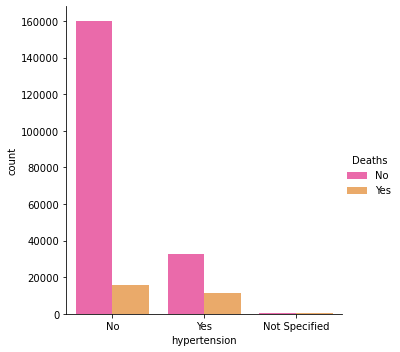

In [43]:
sns.catplot(x= 'hypertension',kind='count', data=df_positive,hue='Deaths',ax=ax1,palette='spring')
plt.show()

__ALL of the above diseases are the most common columns which affect our cases__

### What About the age?

In [44]:
# to group our age
def age_band(age):
    
    if age<2:
        return 'Less than 2'
    elif (age>1) and (age<11):
        return '2-10'
    elif (age>10 and age<21):
        return '10-20'
    elif (age>20 and age<31):
        return '20-30'
    elif (age>30 and age<41):
        return '30-40'
    elif (age>40 and age<51):
        return '40-50'
    elif (age>50 and age<61):
        return '50-60'
    elif (age>60 and age<81):
        return '60-80'
    else:
        return 'Above 80'

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


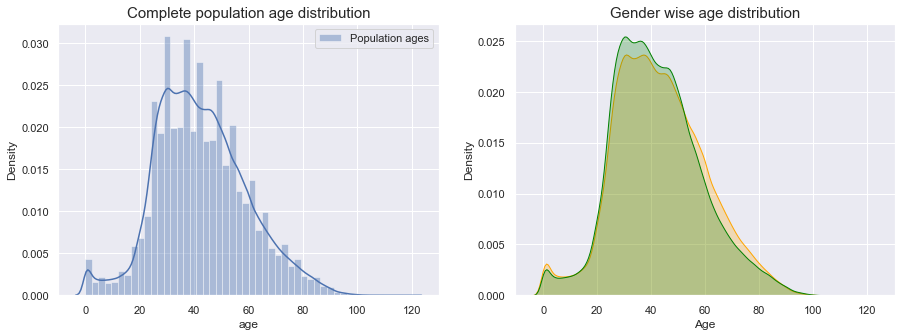

In [45]:
sns.set()
fig1=plt.figure(figsize=(15,5))
ax1=fig1.add_subplot(121)
a=sns.distplot(df['age'],ax=ax1,label='Population ages')
ax1.legend()
ax1.set_title('Complete population age distribution',size=15)
ax2=fig1.add_subplot(122)
df_m=df[df['sex']=='Male']
df_f=df[df['sex']=='Female']

b=sns.kdeplot(df_m['age'],shade=True,ax=ax2,label='Male age distribution',color='orange')
c=sns.kdeplot(df_f['age'],ax=ax2,label='Female age distribution',color='green',shade=True)
ax2.set_xlabel('Age')
ax2.set_title('Gender wise age distribution',size=15)

plt.show() 

__Conclusion: high distribution from 20-60 years__

In [46]:
df['Age band'] = df['age'].apply(age_band)
df['Count'] = 1

In [47]:
df_age_band=df.groupby('Age band')['Count'].count().reset_index().sort_values(by='Count',ascending=False)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


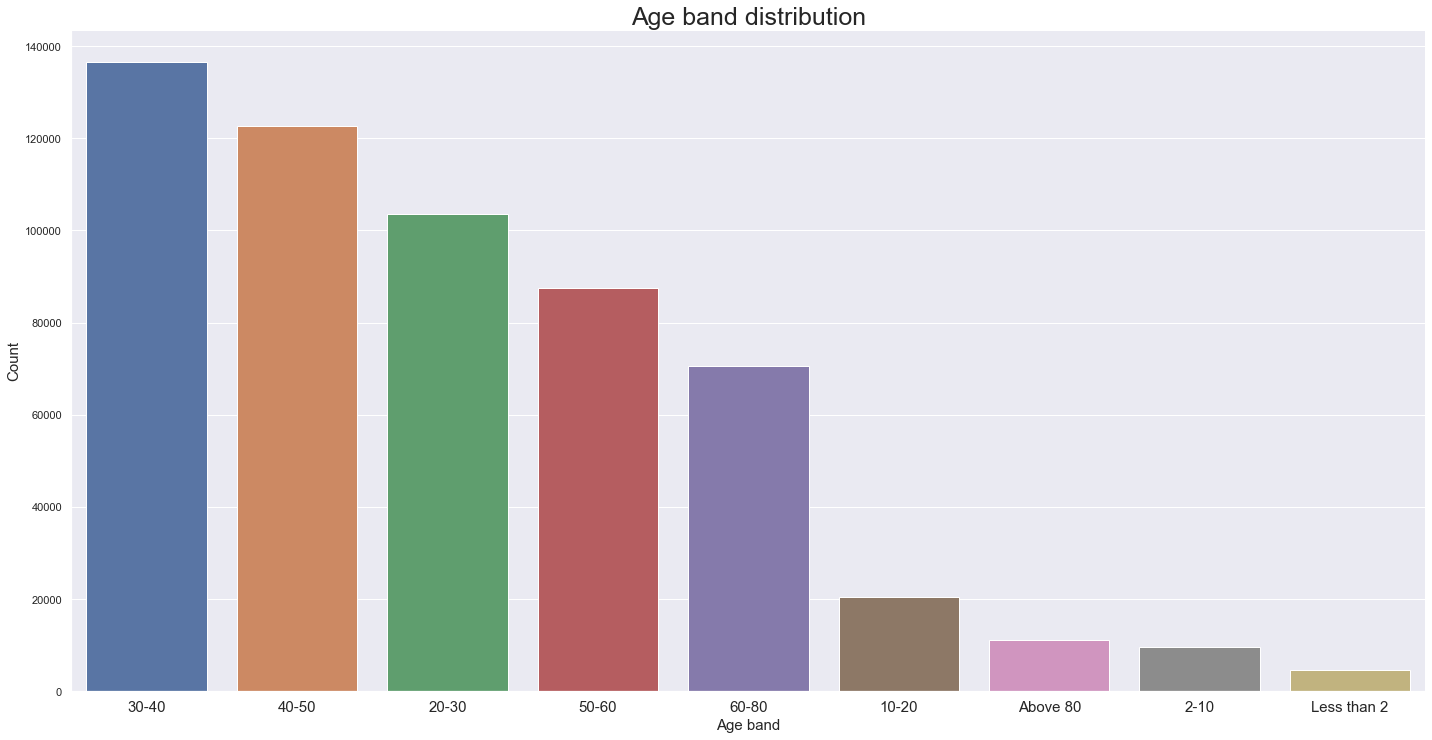

In [48]:
sns.catplot('Age band','Count', data=df_age_band,kind='bar',height=10,aspect=2)


plt.title('Age band distribution',size=25)
plt.xlabel('Age band',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=15)

plt.show()

__Conclusion: most of the cases's age is between 30 and 50__

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


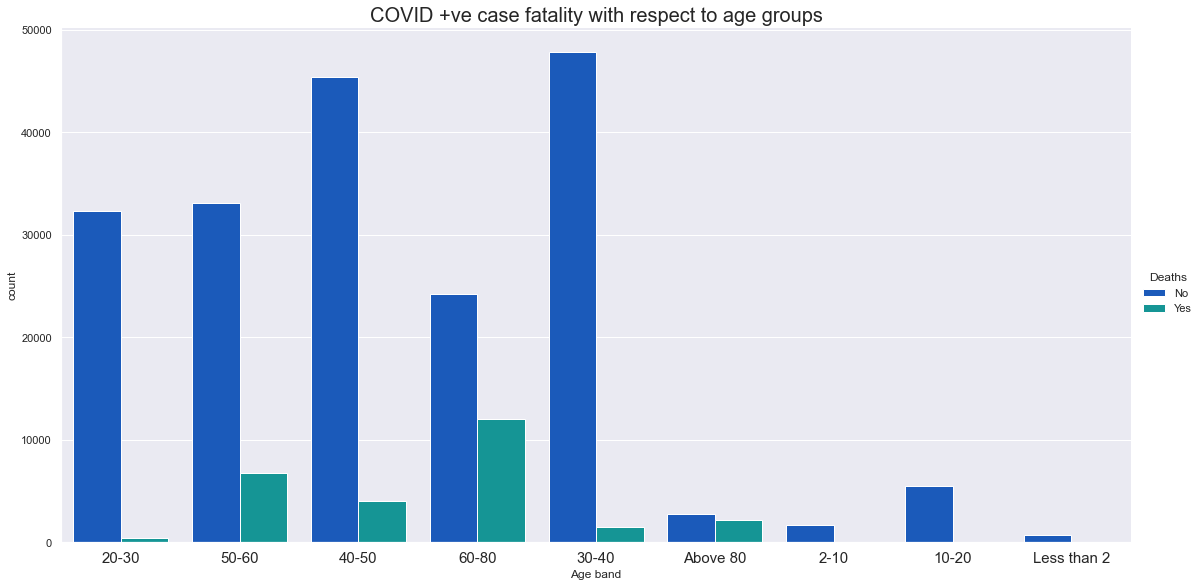

In [49]:
df_pos = df[df['covid_res']=='Positive']

sns.catplot('Age band',kind='count',hue='Deaths',data=df_pos,height=8,aspect=2,palette='winter')
plt.xticks(size=15)
plt.title('COVID +ve case fatality with respect to age groups',size=20)
plt.show()

__Conclusion: From the above plot, it can be seen that the case fatality is quite high for ages of 60-80 and above 80. This is expected since with body, the immune system becomes weaker and hence, it becomes tough for the body to fight a completely new virus. This is not just true for COVID but for most diseases.__

__We wanna make sure the about the age with +ve and deaths!__

In [50]:
# take sample form the positive df
age_sample = df_pos.sample(n=1000) 

In [51]:
age_sample.head(1)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths,Age band,Count
8158,Female,Outpatient,2020-04-24,2020-09-04,Not Specified,Not Specified,No,32,Yes,No,...,No,No,No,No,Yes,Positive,Not Specified,No,30-40,1


In [52]:
# if we take a random sample with size = 1000, ten thoundas time
age_tests = np.random.choice(age_sample['age'], size=(1000,10000))

In [53]:
# get the porpotions of each case(sample)
age_tests = age_tests.mean(axis=1)

In [54]:
age_tests.shape

(1000,)

In [55]:
age_tests[0]

46.4469

In [56]:
age_series = pd.Series(age_tests)

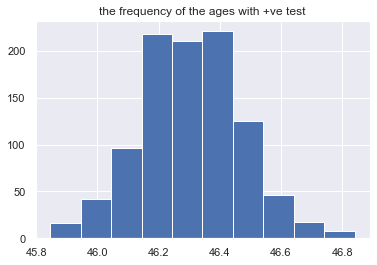

In [57]:
age_series.hist()
plt.title("the frequency of the ages with +ve test")
plt.show()

In [58]:
# we are 95 confident the mean of the age will be between this intervals
(round(np.percentile(age_tests, 2.5),2), round(np.percentile(age_tests, 97.5),2))

(45.99, 46.64)

__and, the deaths__

In [59]:
age_sample = df_pos[df_pos.Deaths == 'Yes'].sample(n=1000)

In [60]:
age_sample.head(1)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths,Age band,Count
47971,Male,Inpatient,2020-06-16,2020-12-06,19-06-2020,Yes,Yes,51,Not Specified,Yes,...,No,Yes,No,Yes,Yes,Positive,No,Yes,50-60,1


In [61]:
age_tests = np.random.choice(age_sample['age'], size=(1000,10000))

In [62]:
# get the porpotions of each case(sample)
age_tests = age_tests.mean(axis=1)

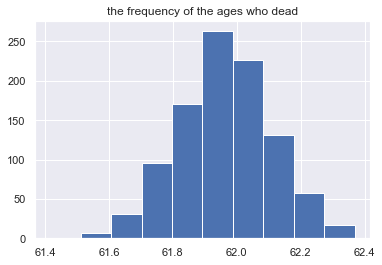

In [63]:
age_series = pd.Series(age_tests)

age_series.hist()
plt.title("the frequency of the ages who dead")
plt.show()

In [64]:
# we are 95 confident the mean of the age will be between this intervals
(round(np.percentile(age_tests, 2.5),2), round(np.percentile(age_tests, 97.5),2))

(61.68, 62.25)

__The ICUs, Clearly explained__

In [65]:
df.icu.value_counts()

Not Specified    444814
No               111676
Yes               10112
Name: icu, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

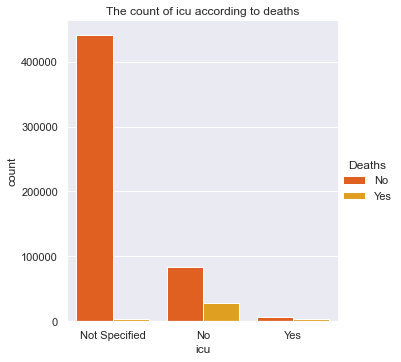

In [66]:
plt.figure(figsize=(10,8))
sns.catplot(x= 'icu', kind='count', data=df, hue='Deaths',ax=ax1,palette='autumn')
plt.title("The count of icu according to deaths")
plt.show()

__the big ratio of people who didn't put on ICU is died__

__why this happend ?__

In [67]:
icu_df = df[df.icu == 'No']
icu_df = icu_df[icu_df.Deaths == 'Yes']

In [68]:
icu_df.head(2)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths,Age band,Count
4,Female,Inpatient,2020-04-13,2020-04-13,22-04-2020,No,No,60,No,Yes,...,Yes,No,No,No,Not Specified,Positive,No,Yes,50-60,1
36,Male,Inpatient,2020-04-27,2020-04-27,28-04-2020,No,Yes,77,Not Specified,No,...,No,No,No,No,Not Specified,Positive,No,Yes,60-80,1


In [69]:
df_age_band = icu_df.groupby('Age band')['Count'].count().reset_index().sort_values(by='Count',ascending=False)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


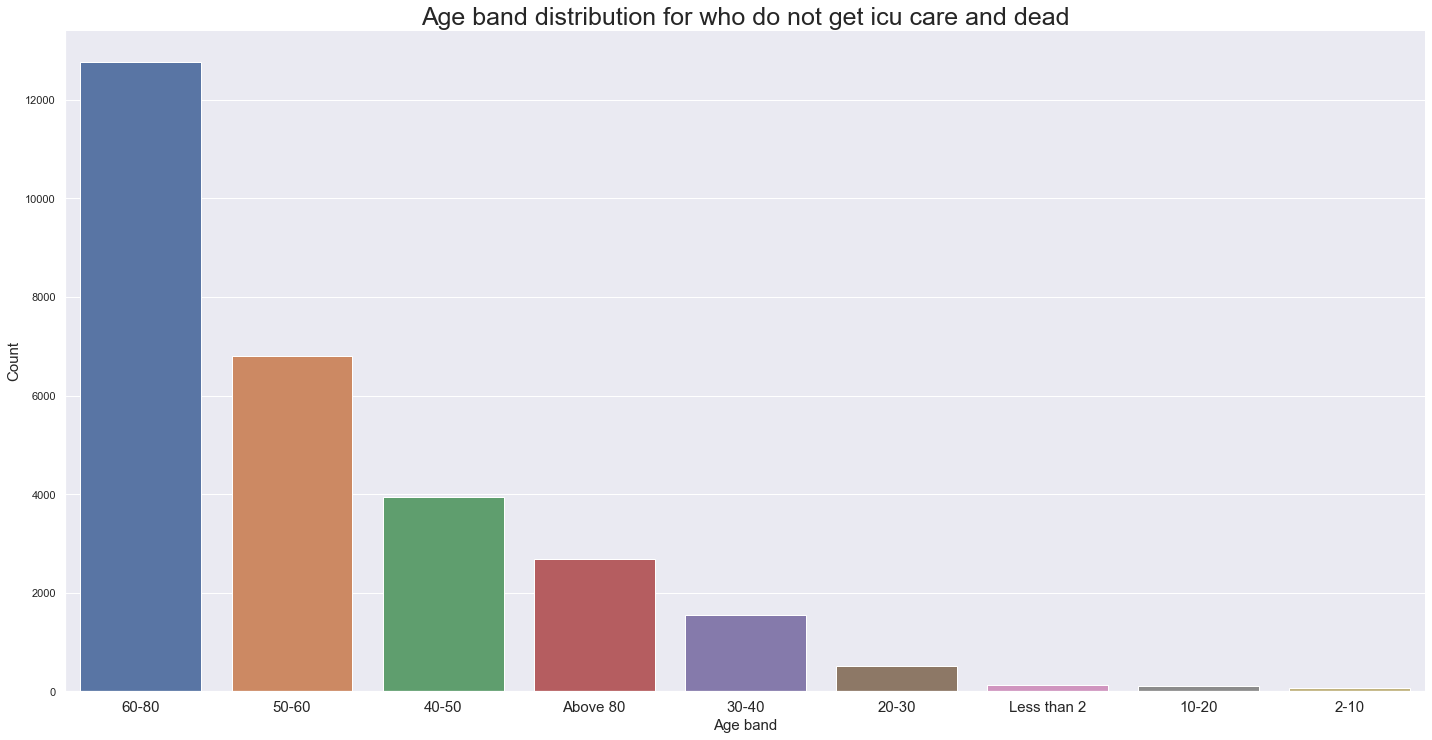

In [70]:
sns.catplot('Age band','Count', data=df_age_band,kind='bar',height=10,aspect=2)

plt.title('Age band distribution for who do not get icu care and dead',size=25)
plt.xlabel('Age band',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=15)

plt.show()

In [71]:
diseases_coulmns = diseases_df.columns

In [72]:
def value_counts(columns,df):
    for column in columns:
        if column == 'sex':
            continue
        df[column].value_counts().plot(kind='pie', autopct= '%1.1f%%',figsize = (10,8),fontsize=12)
        plt.title(f"The ratio between vlaues for the {column} column",fontsize=15)
        plt.show()

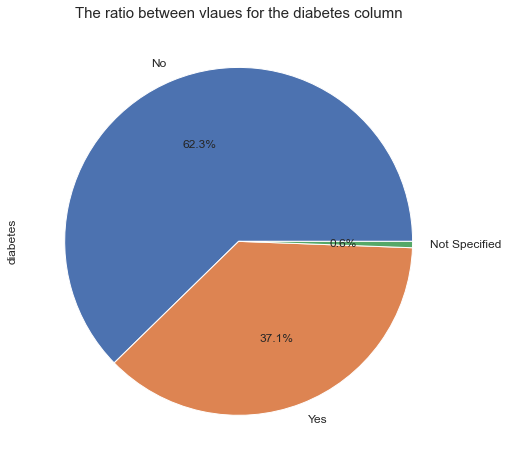

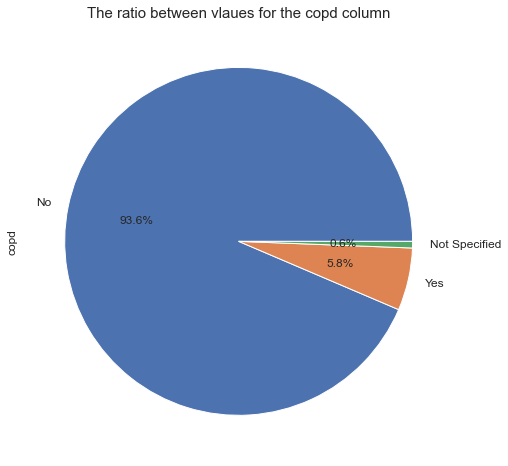

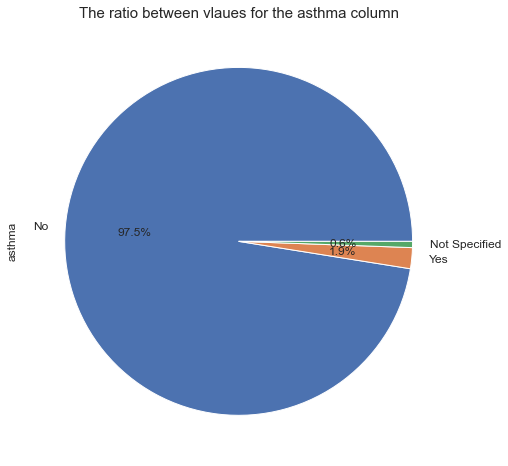

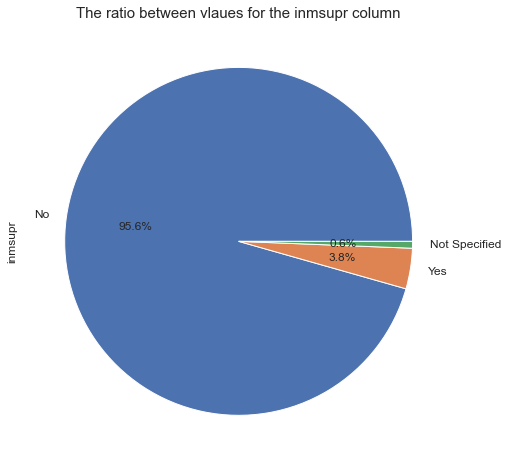

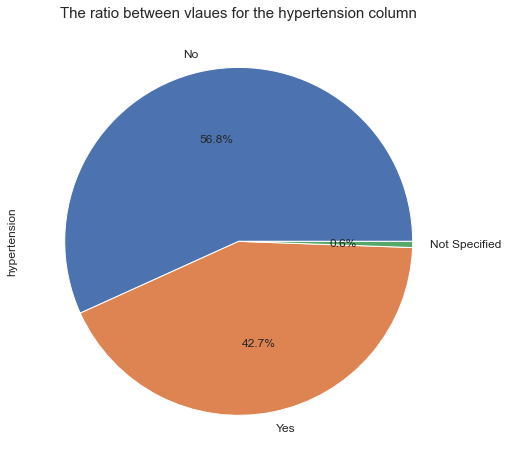

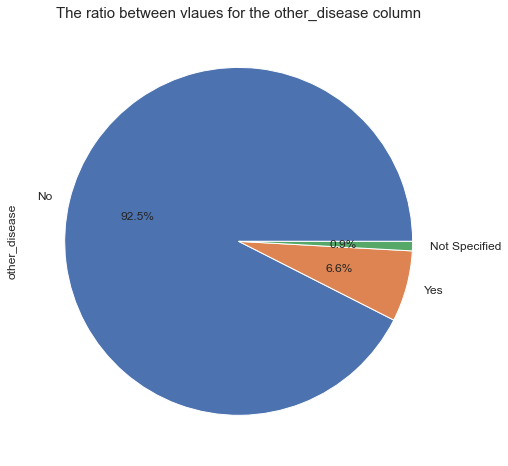

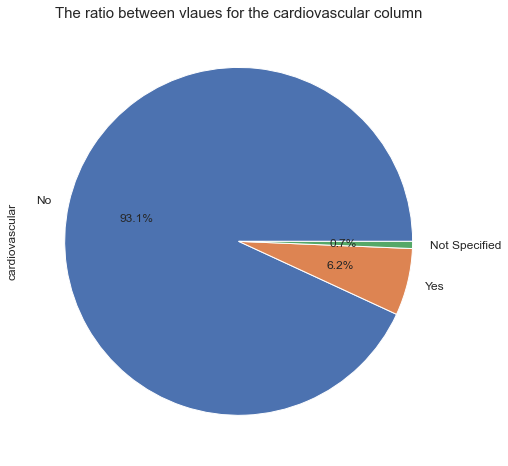

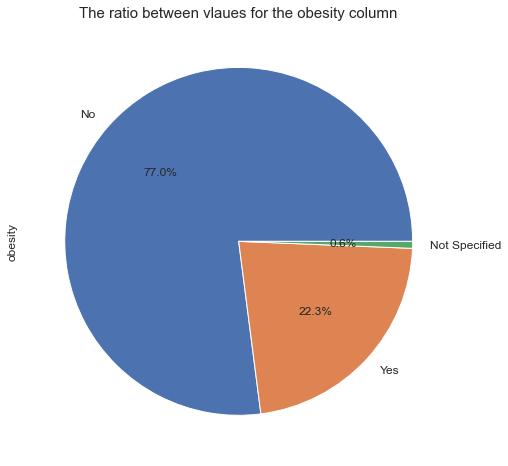

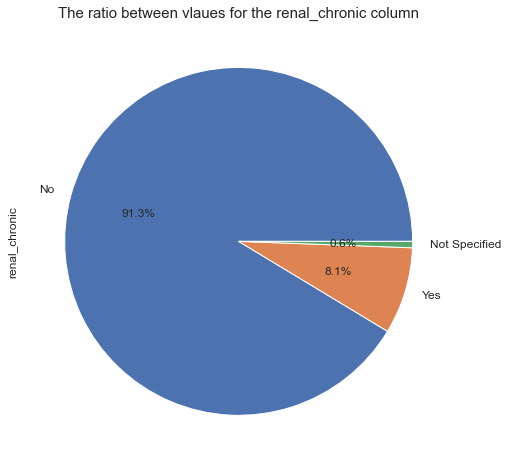

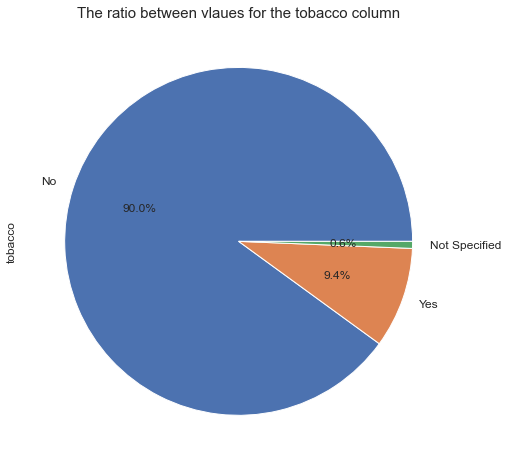

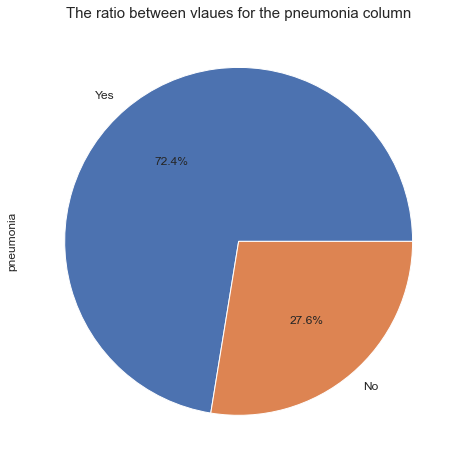

In [73]:
value_counts(diseases_coulmns,icu_df)

## Let's Crack our time

In [74]:
df.head(2)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths,Age band,Count
0,Male,Outpatient,2020-04-05,2020-02-05,Not Specified,Not Specified,No,27,Not Specified,No,...,No,No,No,No,No,Positive,Not Specified,No,20-30,1
1,Male,Outpatient,2020-03-19,2020-03-17,Not Specified,Not Specified,No,24,Not Specified,No,...,No,No,No,No,Not Specified,Positive,Not Specified,No,20-30,1


In [75]:
date_df = df.iloc[:, 2:5]

In [76]:
# the differnce between the 
date_df['entry_symptoms_diff'] = date_df.entry_date - date_df.date_symptoms

In [77]:
date_df.head(5)

,entry_date,date_symptoms,date_died,entry_symptoms_diff
0,2020-04-05,2020-02-05,Not Specified,60 days
1,2020-03-19,2020-03-17,Not Specified,2 days
2,2020-06-04,2020-01-04,Not Specified,152 days
3,2020-04-17,2020-10-04,Not Specified,-170 days
4,2020-04-13,2020-04-13,22-04-2020,0 days


In [78]:
# we got negative values: cause the data entry faliure
(date_df.entry_symptoms_diff < '0 day').sum()

101924

In [79]:
101924 / len(df)

0.17988641056685292

In [80]:
def fill_neg(neg):
    if str(neg) < '0 day':
        return 'Not Specified'
    else:
        return str(neg)

In [81]:
date_df['entry_symptoms_diff'] = date_df.entry_symptoms_diff.apply(fill_neg)

In [82]:
date_df.head()

,entry_date,date_symptoms,date_died,entry_symptoms_diff
0,2020-04-05,2020-02-05,Not Specified,60 days 00:00:00
1,2020-03-19,2020-03-17,Not Specified,2 days 00:00:00
2,2020-06-04,2020-01-04,Not Specified,152 days 00:00:00
3,2020-04-17,2020-10-04,Not Specified,Not Specified
4,2020-04-13,2020-04-13,22-04-2020,0 days 00:00:00


In [83]:
# let's aplly on the main data frame

In [84]:
df['entry_symptoms_diff'] = df.entry_date - df.date_symptoms

In [85]:
df.head(1)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths,Age band,Count,entry_symptoms_diff
0,Male,Outpatient,2020-04-05,2020-02-05,Not Specified,Not Specified,No,27,Not Specified,No,...,No,No,No,No,Positive,Not Specified,No,20-30,1,60 days


In [86]:
# convert form date type to int64 data type
df.entry_symptoms_diff = df.entry_symptoms_diff.dt.days

In [87]:
type(df.entry_symptoms_diff[0])

numpy.int64

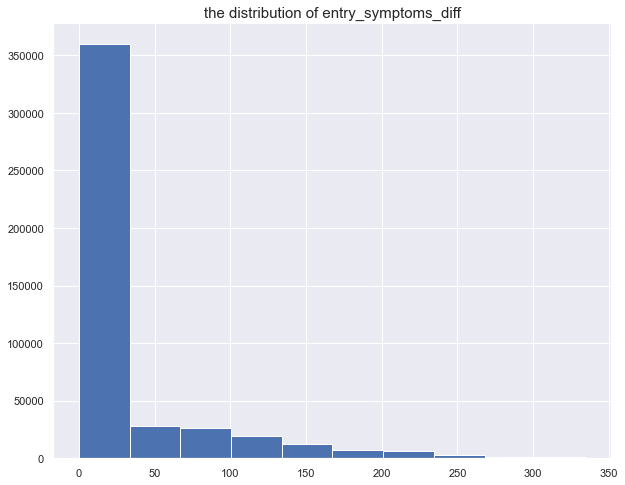

In [88]:
df.entry_symptoms_diff[df.entry_symptoms_diff >=0 ].hist(figsize=(10,8))
plt.title("the distribution of entry_symptoms_diff",fontsize=15)
plt.show()

In [89]:
df.head(1)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths,Age band,Count,entry_symptoms_diff
0,Male,Outpatient,2020-04-05,2020-02-05,Not Specified,Not Specified,No,27,Not Specified,No,...,No,No,No,No,Positive,Not Specified,No,20-30,1,60


In [90]:
# let's explore the trend of +ve cases

In [91]:
# The cases per day
df_case_load=df.groupby('entry_date')['Count'].count().reset_index()
df_case_load.sort_values(by='entry_date',inplace=True)
df_case_load.head(2)

,entry_date,Count
0,2020-01-01,5
1,2020-01-02,8


In [92]:
df_case_load.tail(2)

,entry_date,Count
179,2020-12-05,7072
180,2020-12-06,12151


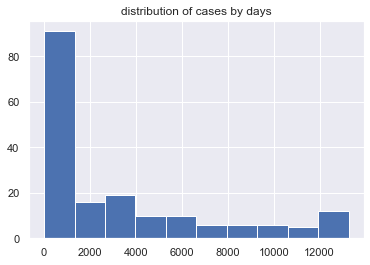

In [93]:
df_case_load.Count.hist();
plt.title("distribution of cases by days")
plt.show()

In [94]:
df_case_load.entry_date = pd.to_datetime(df_case_load.entry_date)

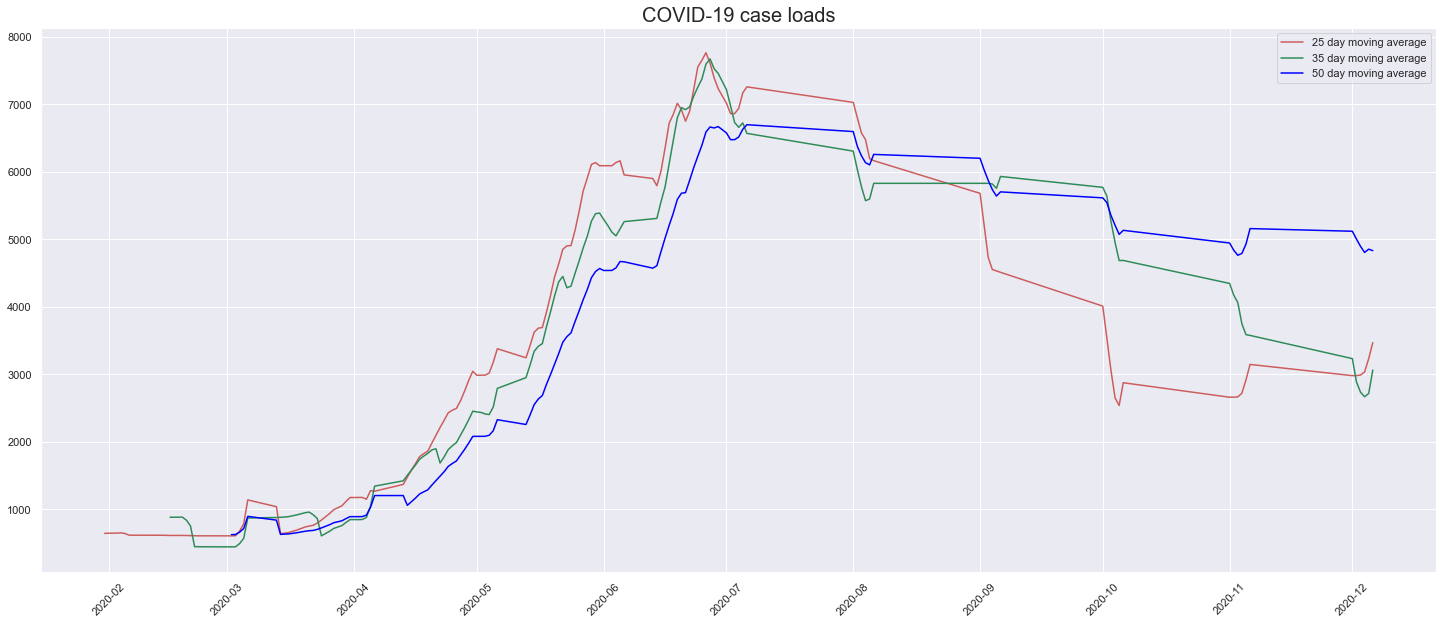

In [95]:
fig1=plt.figure(figsize=(25,10))
ax1=fig1.add_subplot(111)

df_case_load['Moving average_25']=df_case_load['Count'].rolling(25).mean()
df_case_load['Moving average_35']=df_case_load['Count'].rolling(35).mean()
df_case_load['Moving average_50']=df_case_load['Count'].rolling(50).mean()

ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_25'],label='25 day moving average',color='indianred')
ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_35'],label='35 day moving average',color='seagreen')
ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_50'],label='50 day moving average',color='blue')

plt.legend()
plt.title('COVID-19 case loads',size=20)
plt.xticks(rotation=45)

plt.show()

__Conclusion: form the 05_2020: 07_2020 there are a booming in the data__

__What's happening right there?__

In [96]:
# df which got the most cases from 5th to 7th month
booming_df = df[df.entry_date >= '2020-05-01']
booming_df = booming_df[booming_df.entry_date <='2020-07-01']

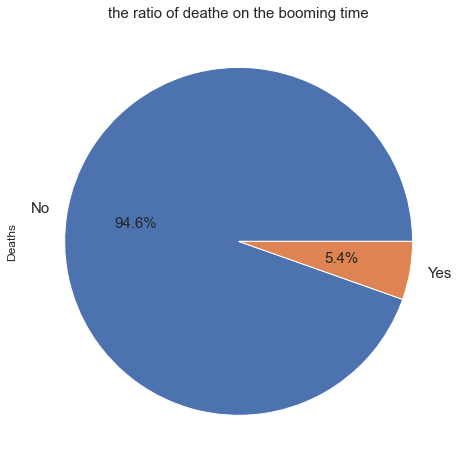

In [97]:
booming_df.Deaths.value_counts().plot(kind='pie',labels=['No','Yes'], autopct= '%1.1f%%',figsize = (10,8),fontsize=15)
plt.title("the ratio of deathe on the booming time",fontsize=15)
plt.show()

In [98]:
df_age_band = booming_df.groupby('Age band')['Count'].count().reset_index().sort_values(by='Count',ascending=False)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


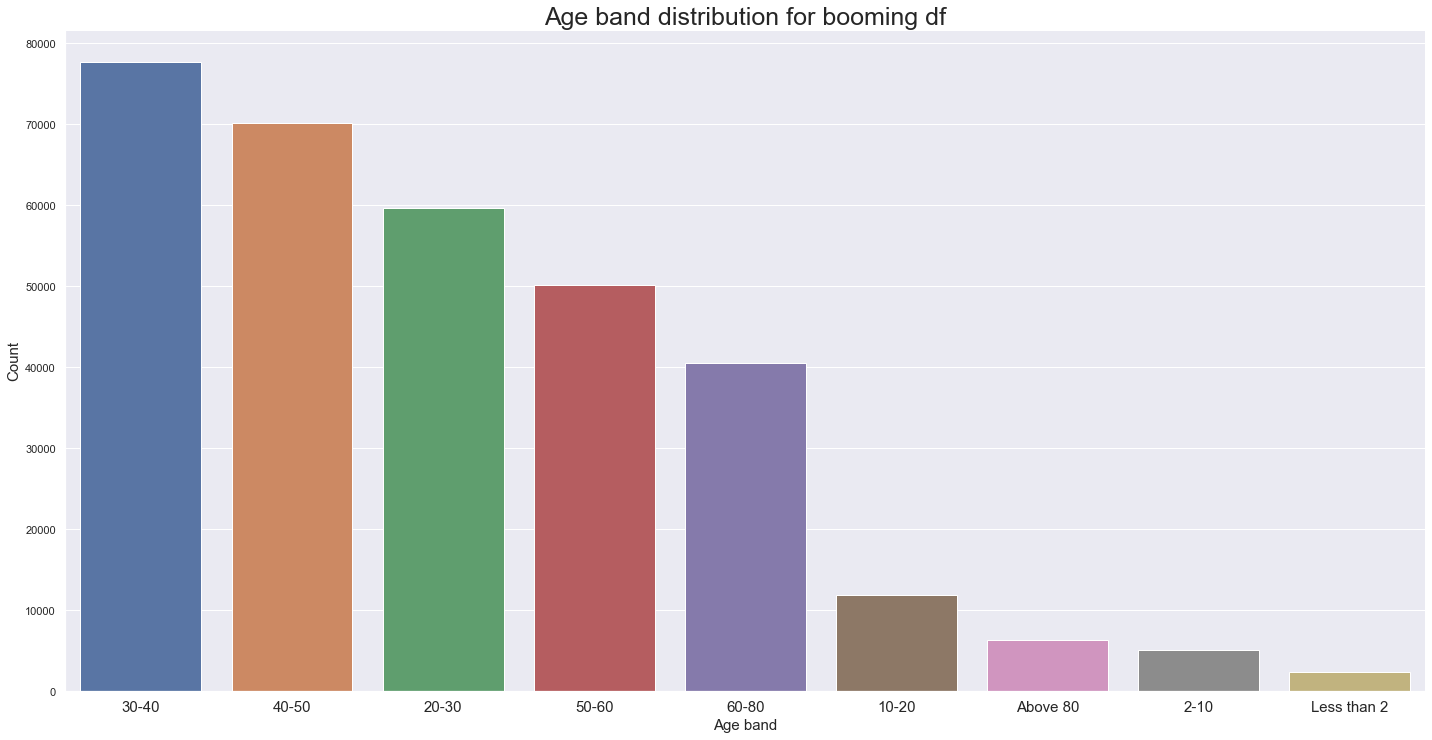

In [99]:
sns.catplot('Age band','Count', data=df_age_band,kind='bar',height=10,aspect=2)

plt.title('Age band distribution for booming df',size=25)
plt.xlabel('Age band',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=15)

plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


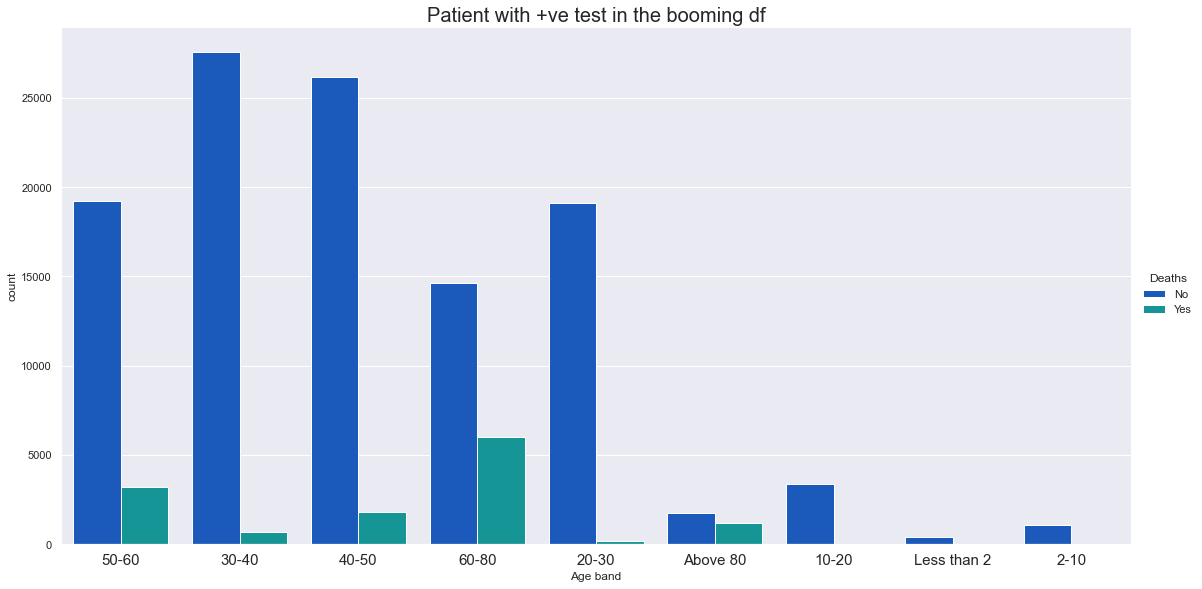

In [100]:
df_pos = booming_df[booming_df['covid_res']=='Positive']

sns.catplot('Age band',kind='count',hue='Deaths',data=df_pos, height=8,aspect=2,palette='winter')
plt.xticks(size=15)
plt.title('Patient with +ve test in the booming df',size=20)
plt.show()

In [101]:
def value_counts(columns,df):
    for column in columns:
        if column == 'sex':
            continue
        df[column].value_counts().plot(kind='pie', autopct= '%1.1f%%',figsize = (10,8),fontsize=12)
        plt.title(f"The ratio between vlaues for the {column} column",fontsize=15)
        plt.show()

__To see the affects of diseases_coulmns on this booming df__

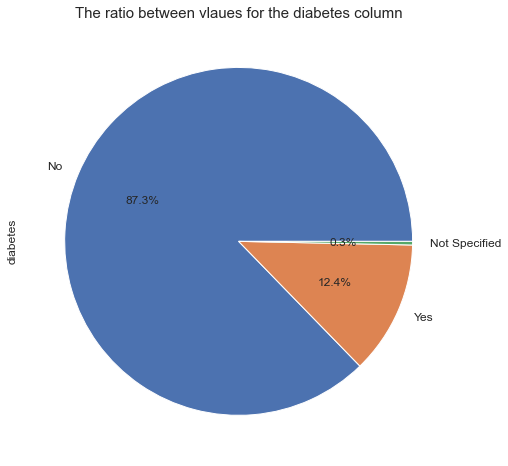

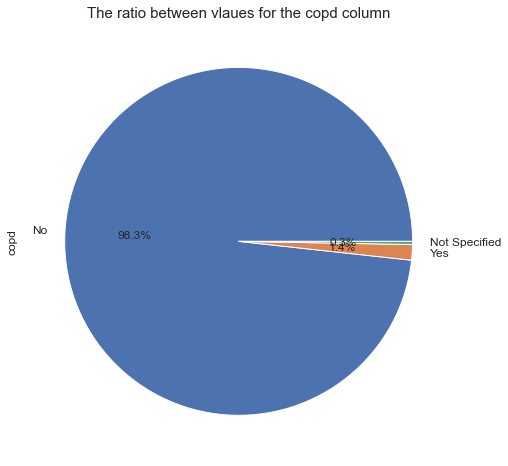

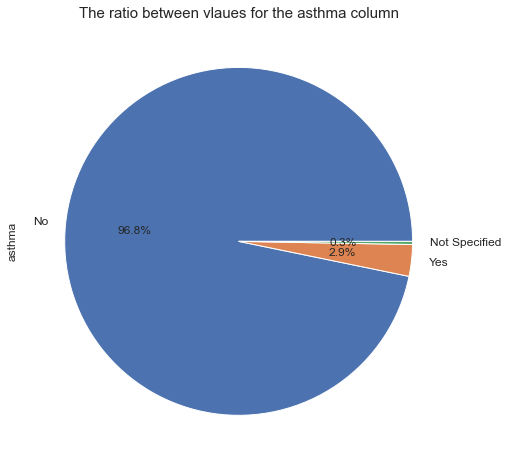

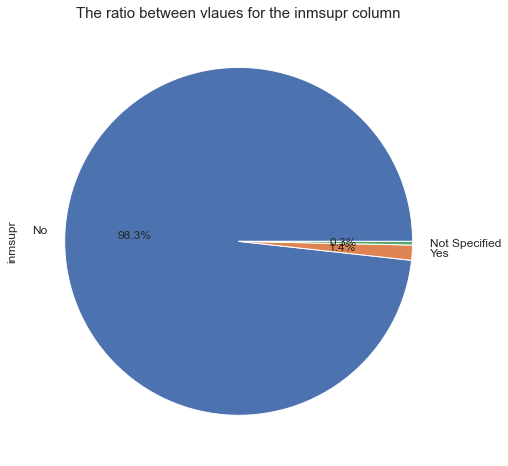

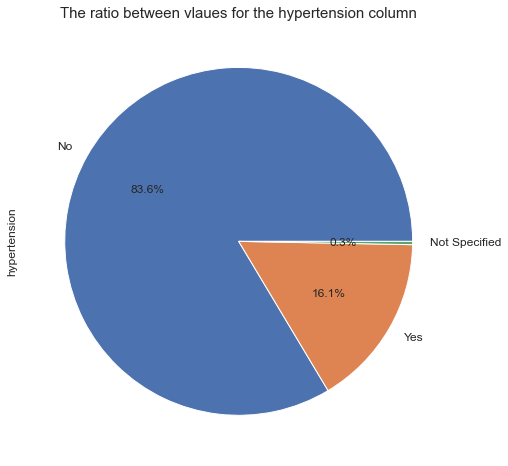

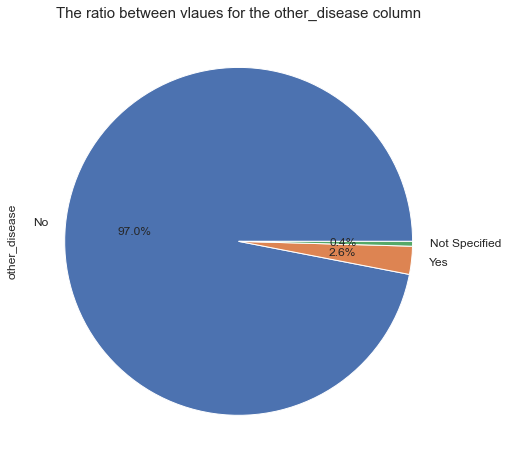

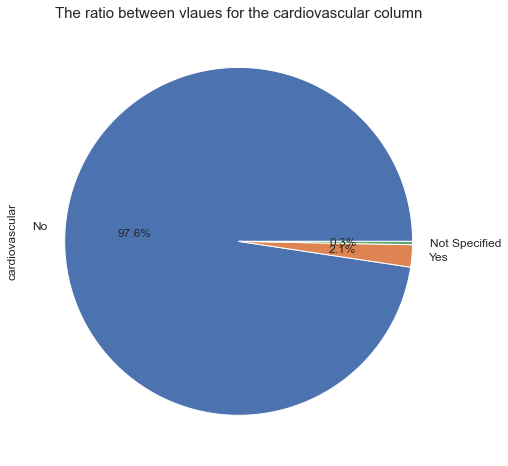

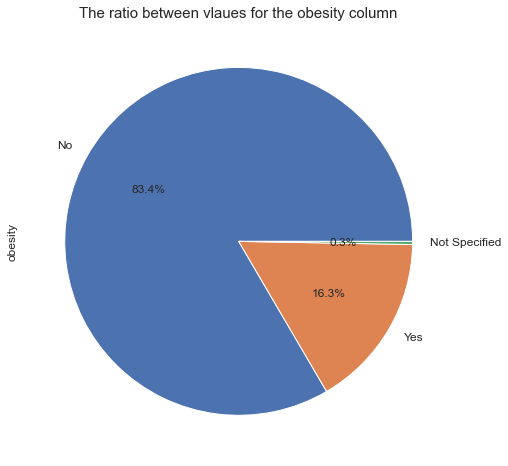

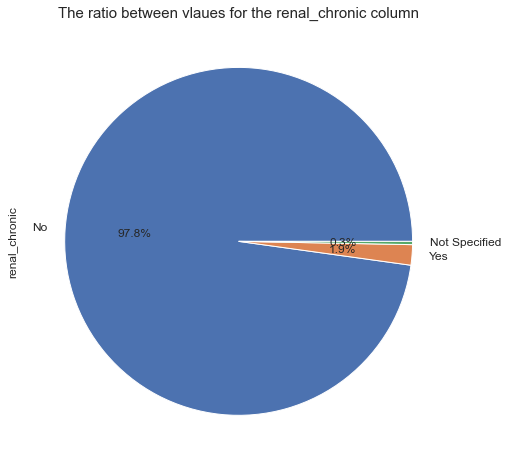

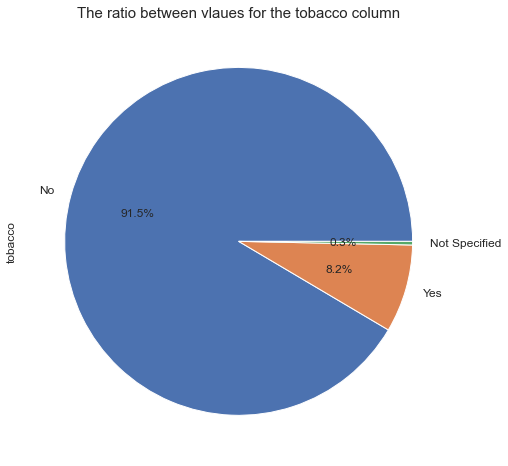

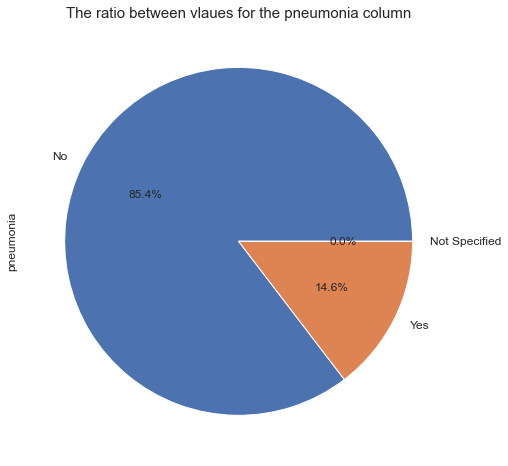

In [102]:
value_counts(diseases_coulmns,booming_df)

__Conclusion:__ _the tobacco, pneumonia, obsity, diabetes, and hypertention are the most diseases affects our deaths_


### Using another global data to evaluate the Mexico medical system

__[The README File Link](https://github.com/owid/covid-19-data/tree/master/public/data)__

In [103]:
total_df = pd.read_csv(r"D:\owid-covid-data.csv")

In [104]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107067 entries, 0 to 107066
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   continent                            107067 non-null  object 
 1   location                             107067 non-null  object 
 2   date                                 107067 non-null  object 
 3   total_cases                          102073 non-null  float64
 4   new_cases                            102065 non-null  float64
 5   total_deaths                         91712 non-null   float64
 6   new_deaths                           91710 non-null   float64
 7   total_cases_per_million              102073 non-null  float64
 8   new_cases_per_million                102065 non-null  float64
 9   total_deaths_per_million             91712 non-null   float64
 10  new_deaths_per_million               91710 non-null   float64
 11  total_vaccina

In [105]:
total_df.fillna(method ='ffill',inplace=True)

__Does the total cases is every thing?__

In [106]:
# helpful to apply the models
eg_df = total_df[total_df.location == 'Egypt']

In [107]:
us_df = total_df[total_df.location == 'United States']

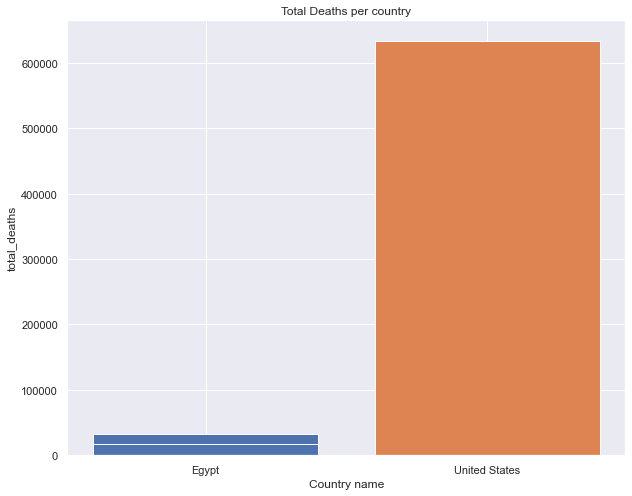

In [108]:
plt.figure(figsize=(10,8))
plt.bar(eg_df["location"], eg_df["total_deaths"],label="Egypt_cases")
plt.bar(us_df["location"], us_df["total_deaths"],label="US_Cases")

plt.xlabel("Country name")
plt.ylabel("total_deaths")
plt.title("Total Deaths per country")

plt.show()

__It's tricky__

In [109]:
# the death porpotions
total_df['death_porp'] = total_df.total_deaths / total_df.total_cases

In [110]:
eg_df = total_df[total_df.location == 'Egypt']
us_df = total_df[total_df.location == 'United States']

In [111]:
total_df.death_porp.dropna(inplace=True)

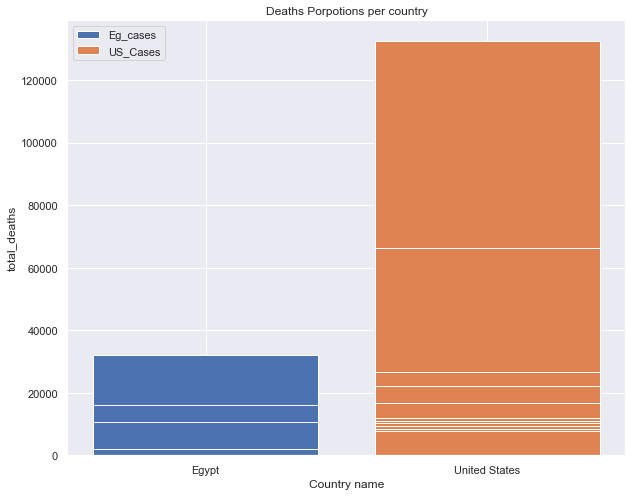

In [112]:
plt.figure(figsize=(10,8))
plt.bar(eg_df["location"],eg_df["death_porp"],label="Eg_cases")
plt.bar(us_df["location"],us_df["death_porp"],label="US_Cases")

plt.xlabel("Country name")
plt.ylabel("total_deaths")
plt.title("Deaths Porpotions per country")

plt.legend()
plt.show()

__It will be helpful if we use the maping of the Power BI files__

In [127]:
mex_df = total_df[total_df.location == 'Mexico']
mex_df.head(1)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,death_porp
62375,North America,Mexico,01/01/2020,8667.0,0.0,27.0,0.0,6806.039,0.0,21.203,...,17336.469,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,0.003115


In [128]:
mex_df_date = mex_df[mex_df.date >= '01/07/2020']
mex_df_date = mex_df_date[mex_df_date.date <= '30/07/2020']

In [129]:
mex_df_date.new_cases.sum()

3133192.0

## Modeling, Will this patient survive or not?

_Pre-Processing_

In [178]:
from sklearn.preprocessing import LabelEncoder

In [188]:
columns = df.columns
dummies_columns = []

for column in columns:
    if df[column].dtype == 'O':
        dummies_columns.append(column)

In [189]:
def label_encoding(columns,df):
    for i in range(len(columns)):
        le = LabelEncoder()
        df[columns[i]] = le.fit_transform(df[columns[i]])

In [190]:
label_encoding(columns, df)

In [191]:
df.death.value_counts()

0    530426
1     36176
Name: death, dtype: int64

In [192]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values  # Deaths
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [193]:
# balance data by label( dead or not)
model = DecisionTreeClassifier()

In [194]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [195]:
predY = model.predict(X_test)

In [196]:
y_test.shape

(113321,)

In [197]:
y_test_series = pd.Series(y_test)
y_test_series.value_counts()

0    105988
1      7333
dtype: int64

In [198]:
predY_series = pd.Series(predY)

In [199]:
predY_series.value_counts()

0    105988
1      7333
dtype: int64

In [200]:
# the accuracy("the same output the ratio of death at y_test and predicted one")
(y_test_series == predY_series).sum() / len(y_test_series)

1.0

In [201]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [202]:
confusion_matrix = pd.crosstab(y_test_series, predY_series, rownames=['Actual'], colnames=['Predicted'], margins = True)

In [203]:
confusion_matrix

Predicted,0,1,All
Actual,,,
0,105988,0,105988
1,0,7333,7333
All,105988,7333,113321


In [204]:
clas_report = classification_report(y_test, predY)

In [205]:
print(clas_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105988
           1       1.00      1.00      1.00      7333

    accuracy                           1.00    113321
   macro avg       1.00      1.00      1.00    113321
weighted avg       1.00      1.00      1.00    113321



In [206]:
# ERROR Rate Is about 85% 

In [207]:
# 0 precision
90428 / (90428 + 1198)

0.9869251085936306

In [208]:
# 1 percision
6135 / (6135 + 15560)

0.28278405162479836

In [209]:
# df.to_csv('Mexico_Covid.csv')

# Im_Balanced

In [210]:
# pip install imblearn --user 

In [211]:
import imblearn
print(imblearn.__version__)

0.9.1


In [212]:
from imblearn.under_sampling import RandomUnderSampler

In [213]:
# undersample model
# reduce the majority rows to be equals the miniority one
undersample = RandomUnderSampler(sampling_strategy='majority')

In [214]:
X_over, y_over = undersample.fit_resample(X, y)

In [215]:
X_over.shape

(72352, 22)

In [216]:
y_over.shape

(72352,)

In [217]:
# to check
from collections import Counter

In [218]:
print(Counter(y_over))

Counter({0: 36176, 1: 36176})


In [222]:
# actual
df.death.value_counts()

0    530426
1     36176
Name: death, dtype: int64

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=35)

In [224]:
model = DecisionTreeClassifier()

In [225]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [226]:
predY = model.predict(X_test)

In [227]:
# accuarcy
(predY == y_test).sum() / len(y_test)

1.0

__Confusion Matrix__

In [228]:
confusion_matrix = pd.crosstab(y_test, predY, rownames=['Actual'], colnames=['Predicted'], margins = True)

In [229]:
confusion_matrix

Predicted,0,1,All
Actual,,,
0,10829,0,10829
1,0,10877,10877
All,10829,10877,21706


__Report__

In [230]:
class_report = classification_report(y_test, predY)

In [231]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10829
           1       1.00      1.00      1.00     10877

    accuracy                           1.00     21706
   macro avg       1.00      1.00      1.00     21706
weighted avg       1.00      1.00      1.00     21706



# The End ^_^